# Program for HW10

HW - 10

Name: Arush Kumar Singh

Roll No: 190182


In [198]:
#importing libraries 
import numpy as np
import math
import sys
import sympy as sym
from sympy import symbols, exp
import matplotlib.pyplot as plt 

%matplotlib inline

#setting precision upto10 digits
np.set_printoptions(precision=20)
np.set_printoptions(suppress=True)

In [199]:
#input parameters
m = 100


dz = 0.01
dt = 0.1*dz*dz
n1 = int((1-0)/dz) + 1 
n2 = int((1-0)/dt) + 2
n2

100001

In [200]:
#The function which takes upper and lower value a2 and a2 rept. and creates an array of difference d
def linspace(a1,a2,d):
    n = int((a2 - a1)/d + 1)
    x = np.zeros(n)
    for i in range(n-1):
        x[i] = a1
        a1 = a1 + d
    x[n-1] = a2
    return x

In [201]:
#function for error given two numpy array of 1xn
def err(a,b):
    e = 0 
    for i in range(n1):
        e = e + (a[i] - b[i])**2
    e = math.sqrt(e)
    return e 

In [202]:
arrz = linspace(0,1,dz)
arrz

array([0.                  , 0.01                , 0.02                ,
       0.03                , 0.04                , 0.05                ,
       0.060000000000000005, 0.07                , 0.08                ,
       0.09                , 0.09999999999999999 , 0.10999999999999999 ,
       0.11999999999999998 , 0.12999999999999998 , 0.13999999999999999 ,
       0.15                , 0.16                , 0.17                ,
       0.18000000000000002 , 0.19000000000000003 , 0.20000000000000004 ,
       0.21000000000000005 , 0.22000000000000006 , 0.23000000000000007 ,
       0.24000000000000007 , 0.25000000000000006 , 0.26000000000000006 ,
       0.2700000000000001  , 0.2800000000000001  , 0.2900000000000001  ,
       0.3000000000000001  , 0.3100000000000001  , 0.3200000000000001  ,
       0.3300000000000001  , 0.34000000000000014 , 0.35000000000000014 ,
       0.36000000000000015 , 0.37000000000000016 , 0.38000000000000017 ,
       0.3900000000000002  , 0.4000000000000002  , 

In [203]:
# creating an array to store values
Alpha = np.zeros(n1)
Beta = np.zeros(n1)
Gamma = np.zeros(n1)
P = np.zeros(n1)
thomas = np.zeros((n1,3))
thomas0 = np.zeros((n1,3))
thomas1 = np.zeros((n1,1))
theta  = np.zeros((n2,n1))
theta1  = np.zeros(n1)
theta2  = np.zeros(n1)
Coeff = np.zeros((4,n1))


In [204]:
def coeff(z):
    alpha = 1/dz**2 + 1/(2*(z-1)*dz)
    beta = 2/(dz**2) + 1/dt
    gamma = 1/(dz**2) + 1/(2*(z-1)*dz)
    p = 1/dt + m/(z-1)
    return alpha, beta, gamma, p

In [205]:
for i in range(n1-1):
    Coeff[0][i],Coeff[1][i],Coeff[2][i],Coeff[3][i] = coeff(arrz[i])
Coeff[0][100],Coeff[1][100],Coeff[2][100],Coeff[3][100] = coeff(0.99999)   
Coeff

array([[    9950.            ,     9949.494949494949,
            9948.979591836734,     9948.453608247422,
            9947.916666666666,     9947.368421052632,
            9946.808510638299,     9946.236559139785,
            9945.652173913044,     9945.054945054944,
            9944.444444444445,     9943.8202247191  ,
            9943.181818181818,     9942.528735632184,
            9941.860465116279,     9941.176470588236,
            9940.47619047619 ,     9939.759036144578,
            9939.024390243903,     9938.271604938273,
            9937.5           ,     9936.708860759494,
            9935.897435897436,     9935.064935064935,
            9934.21052631579 ,     9933.333333333334,
            9932.432432432432,     9931.506849315068,
            9930.555555555555,     9929.577464788732,
            9928.57142857143 ,     9927.536231884058,
            9926.470588235294,     9925.373134328358,
            9924.242424242424,     9923.076923076924,
            9921.875        

In [206]:
#thomas matrix and its values
for i in range(1,n1-1):
    thomas[i][2] = Coeff[0][i]
    thomas[i][1] = -1*Coeff[1][i]
    thomas[i][0] = Coeff[2][i]
thomas[0][0] = 1
thomas[n1-1][0] = 1
thomas[n1-1][1] = -4
thomas[n1-1][2] = 3
thomas

array([[      1.            ,       0.            ,       0.            ],
       [   9949.494949494949, -119999.99999999999 ,    9949.494949494949],
       [   9948.979591836734, -119999.99999999999 ,    9948.979591836734],
       [   9948.453608247422, -119999.99999999999 ,    9948.453608247422],
       [   9947.916666666666, -119999.99999999999 ,    9947.916666666666],
       [   9947.368421052632, -119999.99999999999 ,    9947.368421052632],
       [   9946.808510638299, -119999.99999999999 ,    9946.808510638299],
       [   9946.236559139785, -119999.99999999999 ,    9946.236559139785],
       [   9945.652173913044, -119999.99999999999 ,    9945.652173913044],
       [   9945.054945054944, -119999.99999999999 ,    9945.054945054944],
       [   9944.444444444445, -119999.99999999999 ,    9944.444444444445],
       [   9943.8202247191  , -119999.99999999999 ,    9943.8202247191  ],
       [   9943.181818181818, -119999.99999999999 ,    9943.181818181818],
       [   9942.528735632

In [207]:
#solving for t = 0
thomas1[0] = 1
#solving thomas matrix
r = thomas[1][0]/thomas[0][0] 
thomas[1][0]  =  thomas[1][0] - thomas[0][0]*r
thomas1[1][0] =  thomas1[1][0] - thomas1[0][0]*r

for i in range(1,n1-2):
    r = thomas[i+1][0]/thomas[i][1]
    thomas[i+1][0] = thomas[i+1][0] - thomas[i][1]*r
    thomas[i+1][1] = thomas[i+1][1] - thomas[i][2]*r
    thomas1[i+1][0] = thomas1[i+1][0] - thomas1[i][0]*r


    r = thomas[n1-1][0]/thomas[n1-3][1]
    thomas[n1-1][0] = thomas[n1-1][0] - thomas[n1-3][1]*(r)
    thomas[n1-1][1] = thomas[n1-1][1] - thomas[n1-3][2]*(r)
    thomas1[n1-1][0] = thomas1[n1-1][0] - thomas1[n1-3][0]*(r)


    r = thomas[n1-1][1]/thomas[n1-2][1]
    thomas[n1-1][1] = thomas[n1-1][1] - thomas[n1-2][1]*r
    thomas[n1-1][2] = thomas[n1-1][2] - thomas[n1-2][2]*r
    thomas1[n1-1][0] = thomas1[n1-1][0] - thomas1[n1-2][0]*r
    
#back substitution
theta[0][n1-1] = thomas1[n1-1]/thomas[n1-1][2]
for i in range(n1-2):
    theta[0][n1-i-2] = (thomas1[n1-i-2] - thomas[n1-i-2][2]*theta[0][n1-i-1])/thomas[n1-i-2][1]
theta[0][0] = 1
theta[0]

array([1.                    , 0.08349038075195495   ,
       0.006970277495659542  , 0.0005818893495386061 ,
       0.00004857434747970723, 0.00000405461168257426,
       0.00000033842837356953, 0.00000002824612904525,
       0.00000000235735631698, 0.00000000019672750066,
       0.00000000001641639821, 0.00000000000136981852,
       0.00000000000011429307, 0.0000000000000095356 ,
       0.00000000000000079551, 0.00000000000000006636,
       0.00000000000000000554, 0.00000000000000000046,
       0.00000000000000000004, 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0. 

In [208]:
#solving thomas matrix for all time stamps using thomas algo repitatively
error = 1
j = 1 
while(error > 1e-8):
    
    #thomas matrix
    for i in range(1,n1-1):
        thomas[i][2] = Coeff[0][i]
        thomas[i][1] = -1*Coeff[1][i]
        thomas[i][0] = Coeff[2][i]
    thomas[0][0] = 1
    thomas[n1-1][0] = 1
    thomas[n1-1][1] = -4
    thomas[n1-1][2] = 3
    
    
    
    #constant part of thomas matrix
    for i in range(1,n1-1):
        thomas1[i] = -1*theta[j-1][i]*Coeff[3][i]
    thomas1[0] = 1
    thomas1[100] = 0
    
    #solving thomas matrix
    r = thomas[1][0]/thomas[0][0] 
    thomas[1][0]  =  thomas[1][0] - thomas[0][0]*r
    thomas1[1][0] =  thomas1[1][0] - thomas1[0][0]*r

    for i in range(1,n1-2):
        r = thomas[i+1][0]/thomas[i][1]
        thomas[i+1][0] = thomas[i+1][0] - thomas[i][1]*r
        thomas[i+1][1] = thomas[i+1][1] - thomas[i][2]*r
        thomas1[i+1][0] = thomas1[i+1][0] - thomas1[i][0]*r


        r = thomas[n1-1][0]/thomas[n1-3][1]
        thomas[n1-1][0] = thomas[n1-1][0] - thomas[n1-3][1]*(r)
        thomas[n1-1][1] = thomas[n1-1][1] - thomas[n1-3][2]*(r)
        thomas1[n1-1][0] = thomas1[n1-1][0] - thomas1[n1-3][0]*(r)


        r = thomas[n1-1][1]/thomas[n1-2][1]
        thomas[n1-1][1] = thomas[n1-1][1] - thomas[n1-2][1]*r
        thomas[n1-1][2] = thomas[n1-1][2] - thomas[n1-2][2]*r
        thomas1[n1-1][0] = thomas1[n1-1][0] - thomas1[n1-2][0]*r
    
    #back substitution
    theta[j][n1-1] = thomas1[n1-1]/thomas[n1-1][2]
    for i in range(n1-2):
        theta[j][n1-i-2] = (thomas1[n1-i-2] - thomas[n1-i-2][2]*theta[j][n1-i-1])/thomas[n1-i-2][1]
    theta[j][0] = 1
    
    
    error = err(theta[j],theta[j-1])
    j = j+1



In [209]:
theta[0]

array([1.                    , 0.08349038075195495   ,
       0.006970277495659542  , 0.0005818893495386061 ,
       0.00004857434747970723, 0.00000405461168257426,
       0.00000033842837356953, 0.00000002824612904525,
       0.00000000235735631698, 0.00000000019672750066,
       0.00000000001641639821, 0.00000000000136981852,
       0.00000000000011429307, 0.0000000000000095356 ,
       0.00000000000000079551, 0.00000000000000006636,
       0.00000000000000000554, 0.00000000000000000046,
       0.00000000000000000004, 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0.                    , 0.                    ,
       0. 

In [224]:
j

4048

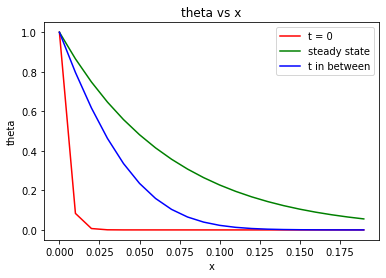

In [213]:
#plotting with matplotlib library on the same graph
plt.plot(arrz[0:20],theta[0][0:20],color='r', label='t = 0')
plt.plot(arrz[0:20],theta[4047][0:20],color='g', label='steady state')
plt.plot(arrz[0:20],theta[100][0:20],color='b', label='t in between')



plt.xlabel("x")
plt.ylabel("theta")
plt.title("theta vs x")
plt.legend()
plt.show()

In [214]:
#imported data from HW9

theta_old = np.array([1.          , 0.6096117968, 0.3716265428, 0.2265479245, 0.1381062873, 0.084191222 , 0.0513239621, 0.0312876927,
       0.0190733466, 0.0116273371, 0.0070881619, 0.0043210271,
       0.0026341491, 0.0016058084, 0.0009789197, 0.000596761 ,
       0.0003637926, 0.0002217722, 0.000135195 , 0.0000824164,
       0.000050242 , 0.0000306281, 0.0000186713, 0.0000113822,
       0.0000069387, 0.0000042299, 0.0000025786, 0.000001572 ,
       0.0000009583, 0.0000005842, 0.0000003561, 0.0000002171,
       0.0000001323, 0.0000000807, 0.0000000492, 0.00000003  ,
       0.0000000183, 0.0000000111, 0.0000000068, 0.0000000041,
       0.0000000025, 0.0000000015, 0.0000000009, 0.0000000006,
       0.0000000003, 0.0000000002, 0.0000000001, 0.0000000001,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          ])
theta_old

array([1.          , 0.6096117968, 0.3716265428, 0.2265479245,
       0.1381062873, 0.084191222 , 0.0513239621, 0.0312876927,
       0.0190733466, 0.0116273371, 0.0070881619, 0.0043210271,
       0.0026341491, 0.0016058084, 0.0009789197, 0.000596761 ,
       0.0003637926, 0.0002217722, 0.000135195 , 0.0000824164,
       0.000050242 , 0.0000306281, 0.0000186713, 0.0000113822,
       0.0000069387, 0.0000042299, 0.0000025786, 0.000001572 ,
       0.0000009583, 0.0000005842, 0.0000003561, 0.0000002171,
       0.0000001323, 0.0000000807, 0.0000000492, 0.00000003  ,
       0.0000000183, 0.0000000111, 0.0000000068, 0.0000000041,
       0.0000000025, 0.0000000015, 0.0000000009, 0.0000000006,
       0.0000000003, 0.0000000002, 0.0000000001, 0.0000000001,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.    

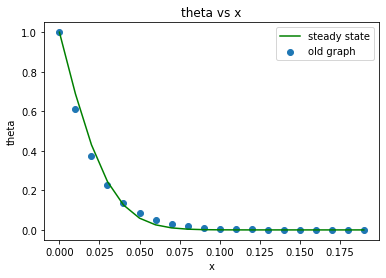

In [223]:
#comparison with old graph
plt.scatter(arrz[0:20],theta_old[0:20],label='old graph')
plt.plot(arrz[0:20],theta[34][0:20],color='g', label='steady state')
plt.xlabel("x")
plt.ylabel("theta")
plt.title("theta vs x")
plt.legend()
plt.show()

# END